In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


## Nue - Energy

## Closure Tests

In [50]:
with open('../stv-analysis-new/nue_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(10):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print(events)
print("")

#------------------------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(100):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+10] for x in range(0, len(AC), 10)]

print(chunks)
print("")
#-----------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(10):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(10):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")

#----------------------------------------------------------------

[21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]

[[0.318149, 0.0383541, 0.0300476, 0.0485722, 0.0403437, -0.0691964, -0.0191378, 0.0401114, 0.00650246, 0.000724415], [0.0383541, 0.659602, 0.302123, 0.11193, 0.0532074, 0.0153179, 0.00257326, 0.0203653, 0.000640447, 0.00079605], [0.0300476, 0.302123, 0.541608, 0.0384979, 0.0400738, 0.039895, 0.0270189, -0.0114113, -0.0051357, 0.000712664], [0.0485722, 0.11193, 0.0384979, 0.291308, 0.0193469, 0.0372602, -0.0196021, -0.0014053, 0.00716217, -0.000886855], [0.0403437, 0.0532074, 0.0400738, 0.0193469, 0.355214, -0.0045451, -0.0230327, -0.00413275, 0.0216362, -0.00263909], [-0.0691964, 0.0153179, 0.039895, 0.0372602, -0.0045451, 0.303443, 0.0850275, -0.0894056, 0.0214143, -0.0023793], [-0.0191378, 0.00257326, 0.0270189, -0.0196021, -0.0230327, 0.0850275, 0.179952, -0.00232196, 0.0689192, 0.0095198], [0.0401114, 0.0203653, -0.0114113, -0.0014053, -0.00413275, -0.0894056, -0.00232196, 0.229036, 0.122674,

In [51]:
made_data_sig = np.dot(chunks, prior_true)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = diff/made_data_sig
print(diffasfrac)

Prior_Truth x AC: 
[ 20.98007273 140.71786251 109.64550771  36.04120876  20.43474941
   8.95281094   3.22490207   2.8842557    1.36266489   0.25323856]


Unfolding Done with MC Data Signal: 
[21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]


Difference
[-0.39792727 -0.02913749  0.23050771 -0.01229124 -0.50245059  1.25971094
  0.56996207 -0.9341943  -0.23562511 -0.06898444]

[-1.89669159e-02 -2.07063193e-04  2.10229966e-03 -3.41032845e-04
 -2.45880477e-02  1.40705634e-01  1.76737792e-01 -3.23894410e-01
 -1.72914933e-01 -2.72408933e-01]


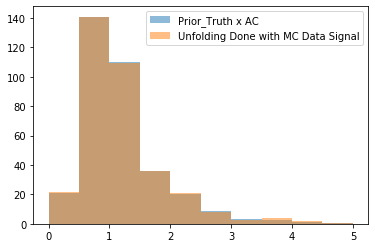

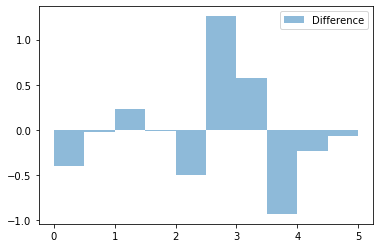

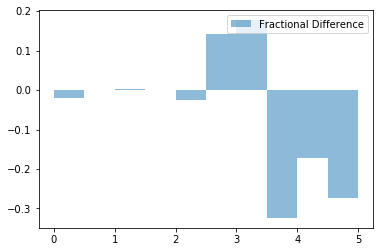

In [52]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.show()


Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]



/tmp/ipykernel_6108/736498321.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ratio_ax2 = plt.subplot(ratio_gs[0])


Text(0.5, 1.0, 'Unsmeared Plot - Nue Energy Differences')

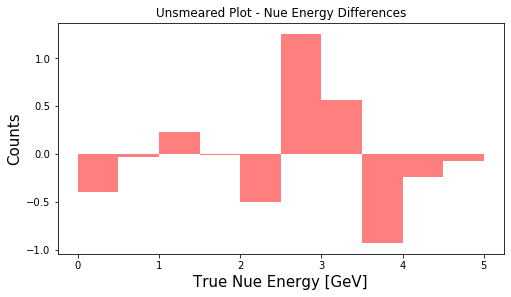

In [53]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax2 = plt.subplot(ratio_gs[0])

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*events[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", events)
print("")

#sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=made_data_sig, alpha=0.8, label='Prior_Truth x AC')
#sel2 = ratio_ax2.hist(count, bins, color='red', weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
sel2 = ratio_ax2.hist(count, bins, color='red', weights=diff, alpha=0.5, label='Unfolding Done with MC Data Signal')
ratio_ax1.set_ylabel('Counts', fontsize=15)
ratio_ax1.set_xlabel('True Nue Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Unsmeared Plot - Nue Energy Differences")

In [54]:
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
n_tot = np.array(events)

#ratio_ax1.bar(bincenters, np.array(errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(events)-np.array(errs)))
ratio_ax1.bar(bincenters, np.array(errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(diff)-np.array(errs)))
ratio_ax1.set_xlim([0, 5])

(0, 5)

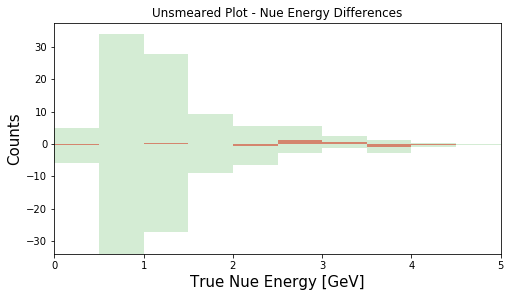

In [55]:
ratio_fig

## Data Tests

In [21]:
with open('../stv-analysis-new/nue_unsmeared_events_energy_MC_ONLY_weighted.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(10):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print(events)
print("")
#------------------------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_errors_energy_MC_ONLY_weighted.csv') as file:
    content = file.readlines()
errors = content[0:]
    
for i in range(10):
    errors[i]=errors[i].rstrip().rstrip(',')
    errors[i] = float(errors[i])
    
print(errors)
print("")

[21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]

[5.35899, 33.9462, 27.5932, 9.12692, 6.06885, 4.14656, 1.72918, 2.01208, 0.616698, 0.12883]




Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]



Text(0.5, 1.0, 'Unsmeared Plot - Nue Energy')

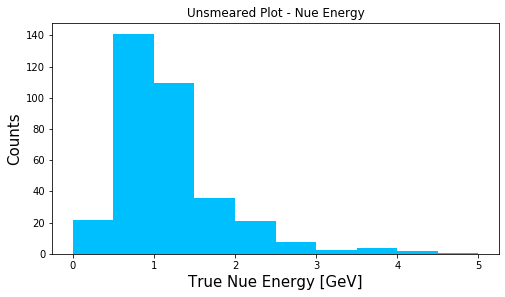

In [22]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*events[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", events)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=events)
ratio_ax1.set_ylabel('Counts', fontsize=15)
ratio_ax1.set_xlabel('True Nue Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Unsmeared Plot - Nue Energy")

In [23]:
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
n_tot = np.array(events)

ratio_ax1.bar(bincenters, np.array(errors)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(events)-np.array(errors)))
ratio_ax1.set_xlim([0, 5])

(0, 5)

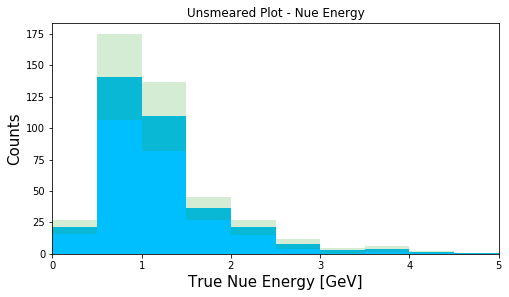

In [24]:
ratio_fig

In [6]:
print(sum(events))

259.52129
